In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [2]:
folder = 'data/'

# Load data
Seeds = pd.read_csv(folder + 'MNCAATourneySeeds.csv')
# display()
Conferences = pd.read_csv(folder + 'MTeamConferences.csv')


RegularDetail = pd.read_csv(folder + 'MRegularSeasonDetailedResults.csv')
TourneyCompact = pd.read_csv(folder + 'MNCAATourneyCompactResults.csv')
TourneyDetail = pd.read_csv(folder + 'MNCAATourneyDetailedResults.csv')
# display(RegularDetail)
# display regulardetail column valus
# print(TourneyCompact.columns.values)
print(TourneyDetail.columns.values)
print(Seeds.columns.values)

['Season' 'DayNum' 'WTeamID' 'WScore' 'LTeamID' 'LScore' 'WLoc' 'NumOT'
 'WFGM' 'WFGA' 'WFGM3' 'WFGA3' 'WFTM' 'WFTA' 'WOR' 'WDR' 'WAst' 'WTO'
 'WStl' 'WBlk' 'WPF' 'LFGM' 'LFGA' 'LFGM3' 'LFGA3' 'LFTM' 'LFTA' 'LOR'
 'LDR' 'LAst' 'LTO' 'LStl' 'LBlk' 'LPF']
['Season' 'Seed' 'TeamID']


In [4]:
RegularDetail.shape

(117748, 34)

## Combined Data

In [3]:
WinTeams = pd.DataFrame()
LoseTeams = pd.DataFrame()

columns = ['Season', 'TeamID', 'Points', 'OppPoints',
       'Loc', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppPF', 'OppID']

WinTeams[columns] = RegularDetail[['Season', 'WTeamID', 'WScore', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF', 'LTeamID']]


def change_loc_win(loc):
    if loc == 'H':
        return 1
    elif loc == 'A':
        return 0
    else:
        return 0.5


WinTeams['Loc'] = WinTeams['Loc'].apply(change_loc_win)

WinTeams['Result'] = 1
# WinTeams['Losses'] = 0

LoseTeams[columns] = RegularDetail[['Season', 'LTeamID', 'LScore', 'WScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
       'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF', 'WTeamID']]

def change_loc_lose(loc):
    if loc == 'H':
        return 0
    elif loc == 'A':
        return 1
    else:
        return 0.5
    

LoseTeams['Loc'] = LoseTeams['Loc'].apply(change_loc_lose)

LoseTeams['Result'] = 0
# LoseTeams['Losses'] = 1

RegularWinLoseTeams = pd.concat([WinTeams, LoseTeams])

display(RegularWinLoseTeams)




,Season,TeamID,Points,OppPoints,Loc,NumOT,FGM,FGA,FGM3,FGA3,...,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,OppID,Result
0,2003,1104,68,62,0.5,0,27,58,3,14,...,22,10,22,8,18,9,2,20,1328,1
1,2003,1272,70,63,0.5,0,26,62,8,20,...,20,20,25,7,12,8,6,16,1393,1
2,2003,1266,73,61,0.5,0,24,58,8,18,...,23,31,22,9,12,2,5,23,1437,1
3,2003,1296,56,50,0.5,0,18,38,3,9,...,15,17,20,9,19,4,3,23,1457,1
4,2003,1400,77,71,0.5,0,30,61,6,14,...,27,21,15,12,10,7,1,14,1208,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117743,2025,1102,62,69,0.0,0,23,49,7,23,...,22,9,27,11,9,3,3,18,1461,0
117744,2025,1139,63,76,0.0,0,24,55,6,23,...,11,4,29,21,9,14,3,15,1462,0
117745,2025,1480,62,80,0.0,0,27,61,4,18,...,29,5,30,11,5,10,2,12,1466,0
117746,2025,1122,68,94,0.0,0,20,59,11,32,...,17,2,27,19,6,4,2,16,1468,0


In [66]:
print(TourneyDetail.columns.values)
print(RegularDetail.columns.values)

['Season' 'DayNum' 'WTeamID' 'WScore' 'LTeamID' 'LScore' 'WLoc' 'NumOT'
 'WFGM' 'WFGA' 'WFGM3' 'WFGA3' 'WFTM' 'WFTA' 'WOR' 'WDR' 'WAst' 'WTO'
 'WStl' 'WBlk' 'WPF' 'LFGM' 'LFGA' 'LFGM3' 'LFGA3' 'LFTM' 'LFTA' 'LOR'
 'LDR' 'LAst' 'LTO' 'LStl' 'LBlk' 'LPF']
['Season' 'DayNum' 'WTeamID' 'WScore' 'LTeamID' 'LScore' 'WLoc' 'NumOT'
 'WFGM' 'WFGA' 'WFGM3' 'WFGA3' 'WFTM' 'WFTA' 'WOR' 'WDR' 'WAst' 'WTO'
 'WStl' 'WBlk' 'WPF' 'LFGM' 'LFGA' 'LFGM3' 'LFGA3' 'LFTM' 'LFTA' 'LOR'
 'LDR' 'LAst' 'LTO' 'LStl' 'LBlk' 'LPF']


In [4]:
WinTeams = pd.DataFrame()
LoseTeams = pd.DataFrame()

columns = ['Season', 'TeamID', 'Points', 'OppPoints',
       'Loc', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppPF', 'OppID']

WinTeams[columns] = TourneyDetail[['Season', 'WTeamID', 'WScore', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF', 'LTeamID']]

def change_loc_win(loc):
    if loc == 'H':
        return 1
    elif loc == 'A':
        return 0
    else:
        return 0.5


WinTeams['Loc'] = WinTeams['Loc'].apply(change_loc_win)

WinTeams['Result'] = 1
# WinTeams['Losses'] = 0

LoseTeams[columns] = TourneyDetail[['Season', 'LTeamID', 'LScore', 'WScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
       'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF', 'WTeamID']]

def change_loc(loc):
    if loc == 'H':
        return 0
    elif loc == 'A':
        return 1
    else:
        return 0.5
    

LoseTeams['Loc'] = LoseTeams['Loc'].apply(change_loc)

LoseTeams['Result'] = 0
# LoseTeams['Losses'] = 1

TourneyWinLoseTeams = pd.concat([WinTeams, LoseTeams])

display(TourneyWinLoseTeams)




,Season,TeamID,Points,OppPoints,Loc,NumOT,FGM,FGA,FGM3,FGA3,...,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,OppID,Result
0,2003,1421,92,84,0.5,1,32,69,11,29,...,31,17,28,16,15,5,0,22,1411,1
1,2003,1112,80,51,0.5,0,31,66,7,23,...,7,8,26,12,17,10,3,15,1436,1
2,2003,1113,84,71,0.5,0,31,59,6,14,...,21,20,22,11,12,2,5,18,1272,1
3,2003,1141,79,73,0.5,0,29,53,3,7,...,17,14,17,20,21,6,6,21,1166,1
4,2003,1143,76,74,0.5,1,27,64,7,20,...,20,10,26,16,14,5,8,19,1301,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,76,0.5,0,19,59,5,20,...,23,8,27,16,4,4,6,16,1301,0
1378,2024,1397,66,72,0.5,0,24,62,11,26,...,33,8,32,16,10,5,2,12,1345,0
1379,2024,1104,72,86,0.5,0,26,58,11,23,...,18,10,25,20,4,4,8,17,1163,0
1380,2024,1301,50,63,0.5,0,21,57,5,19,...,10,10,28,13,14,5,2,8,1345,0


# Filtering Only Present Playing Teams

In [5]:
# Load the MTeams dataset
MTeams = pd.read_csv(folder+'MTeams.csv')

# Filter MTeams to get only teams with LastD1Season == 2025
valid_teams = set(MTeams[MTeams['LastD1Season'] == 2025]['TeamID'])

# Function to filter teams
def filter_teams(df):
    return df[df['TeamID'].isin(valid_teams)]

FilteredRegularTeams = pd.DataFrame()
FilteredTourneyTeams = pd.DataFrame()

# Apply filtering
FilteredRegularTeams = filter_teams(RegularWinLoseTeams)
FilteredTourneyTeams = filter_teams(TourneyWinLoseTeams)

display(FilteredRegularTeams)
display(FilteredTourneyTeams)

,Season,TeamID,Points,OppPoints,Loc,NumOT,FGM,FGA,FGM3,FGA3,...,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,OppID,Result
0,2003,1104,68,62,0.5,0,27,58,3,14,...,22,10,22,8,18,9,2,20,1328,1
1,2003,1272,70,63,0.5,0,26,62,8,20,...,20,20,25,7,12,8,6,16,1393,1
2,2003,1266,73,61,0.5,0,24,58,8,18,...,23,31,22,9,12,2,5,23,1437,1
3,2003,1296,56,50,0.5,0,18,38,3,9,...,15,17,20,9,19,4,3,23,1457,1
4,2003,1400,77,71,0.5,0,30,61,6,14,...,27,21,15,12,10,7,1,14,1208,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117743,2025,1102,62,69,0.0,0,23,49,7,23,...,22,9,27,11,9,3,3,18,1461,0
117744,2025,1139,63,76,0.0,0,24,55,6,23,...,11,4,29,21,9,14,3,15,1462,0
117745,2025,1480,62,80,0.0,0,27,61,4,18,...,29,5,30,11,5,10,2,12,1466,0
117746,2025,1122,68,94,0.0,0,20,59,11,32,...,17,2,27,19,6,4,2,16,1468,0


,Season,TeamID,Points,OppPoints,Loc,NumOT,FGM,FGA,FGM3,FGA3,...,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,OppID,Result
0,2003,1421,92,84,0.5,1,32,69,11,29,...,31,17,28,16,15,5,0,22,1411,1
1,2003,1112,80,51,0.5,0,31,66,7,23,...,7,8,26,12,17,10,3,15,1436,1
2,2003,1113,84,71,0.5,0,31,59,6,14,...,21,20,22,11,12,2,5,18,1272,1
3,2003,1141,79,73,0.5,0,29,53,3,7,...,17,14,17,20,21,6,6,21,1166,1
4,2003,1143,76,74,0.5,1,27,64,7,20,...,20,10,26,16,14,5,8,19,1301,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,76,0.5,0,19,59,5,20,...,23,8,27,16,4,4,6,16,1301,0
1378,2024,1397,66,72,0.5,0,24,62,11,26,...,33,8,32,16,10,5,2,12,1345,0
1379,2024,1104,72,86,0.5,0,26,58,11,23,...,18,10,25,20,4,4,8,17,1163,0
1380,2024,1301,50,63,0.5,0,21,57,5,19,...,10,10,28,13,14,5,2,8,1345,0


In [7]:
# Adding seed to FilteredTourneyTeams
seed_dict = Seeds.set_index(['Season', 'TeamID'])

# Add WinSeed and LoseSeed to FilteredTourneyTeams in columns called 'WinSeed' and 'LoseSeed'
def extract_seed(seed):
    if len(seed) == 4:
        return int(seed[1:-1])
    else:
        return int(seed[1:])

FilteredTourneyTeams.loc[:, 'WinSeed'] = FilteredTourneyTeams.apply(lambda x: extract_seed(seed_dict.loc[(x['Season'], x['TeamID'])]['Seed']), axis=1)
FilteredTourneyTeams.loc[:, 'LoseSeed'] = FilteredTourneyTeams.apply(lambda x: extract_seed(seed_dict.loc[(x['Season'], x['OppID'])]['Seed']), axis=1)

display(FilteredTourneyTeams)


,Season,TeamID,Points,OppPoints,Loc,NumOT,FGM,FGA,FGM3,FGA3,...,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,OppID,Result,WinSeed,LoseSeed
0,2003,1421,92,84,0.5,1,32,69,11,29,...,28,16,15,5,0,22,1411,1,16,16
1,2003,1112,80,51,0.5,0,31,66,7,23,...,26,12,17,10,3,15,1436,1,1,16
2,2003,1113,84,71,0.5,0,31,59,6,14,...,22,11,12,2,5,18,1272,1,10,7
3,2003,1141,79,73,0.5,0,29,53,3,7,...,17,20,21,6,6,21,1166,1,11,6
4,2003,1143,76,74,0.5,1,27,64,7,20,...,26,16,14,5,8,19,1301,1,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,76,0.5,0,19,59,5,20,...,27,16,4,4,6,16,1301,0,4,11
1378,2024,1397,66,72,0.5,0,24,62,11,26,...,32,16,10,5,2,12,1345,0,2,1
1379,2024,1104,72,86,0.5,0,26,58,11,23,...,25,20,4,4,8,17,1163,0,4,1
1380,2024,1301,50,63,0.5,0,21,57,5,19,...,28,13,14,5,2,8,1345,0,11,1


# Group by Season and TeamID

In [8]:
# Create a combinedTeams varilabe that contains all the teams and their stats and group by season and teamID
RegularCombinedTeams = FilteredRegularTeams.groupby(['Season', 'TeamID', 'OppID']).sum()
RegularCombinedTeams['NumGames'] = FilteredRegularTeams.groupby(['Season', 'TeamID', 'OppID']).size()
display(RegularCombinedTeams)

Points  OppPoints  Loc  NumOT  FGM  FGA  FGM3  FGA3  FTM  \
Season TeamID OppID                                                             
2003   1102   1117       57         52  0.0      0   16   36     7    20   18   
              1125       85         76  1.0      0   26   41    12    23   21   
              1140       76        121  1.0      0   25   87     9    53   17   
              1161      129        126  1.0      0   41   80    15    36   32   
              1204      148         96  1.0      0   51   82    28    48   18   
...                     ...        ...  ...    ...  ...  ...   ...   ...  ...   
2025   1480   1407       65         84  1.0      0   28   61     4    13    5   
              1430       74         77  0.5      0   28   58     7    19   11   
              1466      123        158  1.0      0   50  122     8    40   15   
              1468       81         76  0.0      0   23   49    10    22   25   
              1474       68         87  0.0      0   26   61     3    11   13   

                     FTA  ...  OppFTA  OppOR  OppDR  OppAst  OppTO  OppStl  \
Season TeamID OppID       ...                                                
2003   1102   1117    22  ...      21      7     17       8      8       3   
              1125    32  ...      17     13     19      12     14       2   
              1140    30  ...      45     22     62      22     30      13   
              1161    43  ...      30     22     36      24     32      12   
              1204    26  ...      24     23     28      13     35      16   
...                  ...  ...     ...    ...    ...     ...    ...     ...   
2025   1480   1407     6  ...      27     10     14      16     10      11   
              1430    15  ...      35     13     24      13      9       7   
              1466    27  ...      56     19     60      21     10      16   
              1468    31  ...       6      7     19      18     10       5   
              1474    16  ...      14      4     27      19     13       5   

                     OppBlk  OppPF  Result  NumGames  
Season TeamID OppID                                   
2003   1102   1117        0     19       1         1  
              1125        0     25       1         1  
              1140        4     33       0         2  
              1161       11     45       1         2  
              1204        1     36       2         2  
...                     ...    ...     ...       ...  
2025   1480   1407        1     12       0         1  
              1430        3     14       0         1  
              1466        2     29       0         2  
              1468        4     20       1         1  
              1474        6     15       0         1  

[165457 rows x 32 columns]

In [9]:
# Create a combinedTeams varilabe that contains all the teams and their stats and group by season and teamID but do not change WinSeed and LoseSeed Values
TourneyCombinedTeams = FilteredTourneyTeams.groupby(['Season', 'TeamID', 'OppID']).sum()
TourneyCombinedTeams['NumGames'] = FilteredTourneyTeams.groupby(['Season', 'TeamID']).size()
TourneyCombinedTeams['WinSeed'] = FilteredTourneyTeams.groupby(['Season', 'TeamID'])['WinSeed'].mean()
TourneyCombinedTeams['LoseSeed'] = FilteredTourneyTeams.groupby(['Season', 'TeamID'])['LoseSeed'].mean()


# Remove Loc column from the Tourney Data
display(TourneyCombinedTeams)

Points  OppPoints  Loc  NumOT  FGM  FGA  FGM3  FGA3  FTM  \
Season TeamID OppID                                                             
2003   1104   1231       62         67  0.5      0   22   52     5    12   13   
       1112   1211       96         95  0.5      2   34   74     7    24   21   
              1242       75         78  0.5      0   23   55    10    22   19   
              1323       88         71  0.5      0   36   76     7    14    9   
              1436       80         51  0.5      0   31   66     7    23   11   
...                     ...        ...  ...    ...  ...  ...   ...   ...  ...   
2024   1450   1179       66         61  0.5      0   21   55     7    14   17   
              1235       56         67  0.5      0   22   51     5    23    7   
       1458   1241       61         72  0.5      0   19   51     8    21   15   
       1463   1120       78         76  0.5      0   24   52     9    20   21   
              1361       57         85  0.5      0   20   54     7    19   10   

                     FTA  ...  OppDR  OppAst  OppTO  OppStl  OppBlk  OppPF  \
Season TeamID OppID       ...                                                
2003   1104   1231    16  ...     22      15      8       1       2     17   
       1112   1211    29  ...     27      20     11       5       5     25   
              1242    23  ...     22      16     15      13       5     20   
              1323    11  ...     27      15     19       6       4     16   
              1436    14  ...     26      12     17      10       3     15   
...                  ...  ...    ...     ...    ...     ...     ...    ...   
2024   1450   1179    22  ...     23      18      8       7       3     21   
              1235     9  ...     19      14      5       5       2     12   
       1458   1241    23  ...     27      12     11      14       4     20   
       1463   1120    31  ...     25      11     14       6       3     25   
              1361    14  ...     31      16     12       8       3     15   

                     Result  WinSeed  LoseSeed  NumGames  
Season TeamID OppID                                       
2003   1104   1231        0     10.0       7.0         1  
       1112   1211        1      1.0       8.0         4  
              1242        0      1.0       8.0         4  
              1323        1      1.0       8.0         4  
              1436        1      1.0       8.0         4  
...                     ...      ...       ...       ...  
2024   1450   1179        1      7.0       6.0         2  
              1235        0      7.0       6.0         2  
       1458   1241        0      5.0      12.0         1  
       1463   1120        1     13.0       4.5         2  
              1361        0     13.0       4.5         2  

[2763 rows x 34 columns]

In [10]:
# check duplicates and null values in combinedTeams 
TourneyCombinedTeams[TourneyCombinedTeams.duplicated()]
TourneyCombinedTeams.isnull().sum()

Points       0
OppPoints    0
Loc          0
NumOT        0
FGM          0
FGA          0
FGM3         0
FGA3         0
FTM          0
FTA          0
OR           0
DR           0
Ast          0
TO           0
Stl          0
Blk          0
PF           0
OppFGM       0
OppFGA       0
OppFGM3      0
OppFGA3      0
OppFTM       0
OppFTA       0
OppOR        0
OppDR        0
OppAst       0
OppTO        0
OppStl       0
OppBlk       0
OppPF        0
Result       0
WinSeed      0
LoseSeed     0
NumGames     0
dtype: int64

# Creating Ratio Data Inputs of Both Regular and Tourney

In [11]:
RegularSeasonRatio = pd.DataFrame()

RegularSeasonRatio['WinRatio'] = RegularCombinedTeams['Result'] / RegularCombinedTeams['NumGames'] 
RegularSeasonRatio['PointsPerGame'] = RegularCombinedTeams['Points'] / RegularCombinedTeams['NumGames'] 
RegularSeasonRatio['PointsAllowedPerGame'] = RegularCombinedTeams['OppPoints'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['PointsRatio'] = RegularCombinedTeams['Points'] / RegularCombinedTeams['OppPoints']
RegularSeasonRatio['OTPerGame'] = RegularCombinedTeams['NumOT'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['Loc'] = RegularCombinedTeams['Loc'] 

RegularSeasonRatio['FGPerGame'] = RegularCombinedTeams['FGM'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['FGRatio'] = RegularCombinedTeams['FGM'] / RegularCombinedTeams['FGA']
RegularSeasonRatio['FGAllowedPerGame'] = RegularCombinedTeams['OppFGM'] / RegularCombinedTeams['NumGames']

RegularSeasonRatio['FG3PerGame'] = RegularCombinedTeams['FGM3'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['FG3Ratio'] = RegularCombinedTeams['FGM3'] / RegularCombinedTeams['FGA3']
RegularSeasonRatio['FG3AllowedPerGame'] = RegularCombinedTeams['OppFGM3'] / RegularCombinedTeams['NumGames']

RegularSeasonRatio['FTPerGame'] = RegularCombinedTeams['FTM'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['FTRatio'] = RegularCombinedTeams['FTM'] / RegularCombinedTeams['FTA']
RegularSeasonRatio['FTAllowedPerGame'] = RegularCombinedTeams['OppFTM'] / RegularCombinedTeams['NumGames']

RegularSeasonRatio['ORRatio'] = RegularCombinedTeams['OR'] / (RegularCombinedTeams['OR'] + RegularCombinedTeams['OppDR'])
RegularSeasonRatio['DRRatio'] = RegularCombinedTeams['DR'] / (RegularCombinedTeams['DR'] + RegularCombinedTeams['OppOR'])

RegularSeasonRatio['AstPerGame'] = RegularCombinedTeams['Ast'] / RegularCombinedTeams['NumGames']

RegularSeasonRatio['TOPerGame'] = RegularCombinedTeams['TO'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['StlPerGame'] = RegularCombinedTeams['Stl'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['BlkPerGame'] = RegularCombinedTeams['Blk'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['PFPerGame'] = RegularCombinedTeams['PF'] / RegularCombinedTeams['NumGames']

RegularSeasonRatio['AstAllowedPerGame'] = RegularCombinedTeams['OppAst'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['TOAllowedPerGame'] = RegularCombinedTeams['OppTO'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['StlAllowedPerGame'] = RegularCombinedTeams['OppStl'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['BlkAllowedPerGame'] = RegularCombinedTeams['OppBlk'] / RegularCombinedTeams['NumGames']
RegularSeasonRatio['PFAllowedPerGame'] = RegularCombinedTeams['OppPF'] / RegularCombinedTeams['NumGames']

RegularSeasonRatio['AstRatio'] = RegularCombinedTeams['Ast'] / (RegularCombinedTeams['Ast'] + RegularCombinedTeams['OppAst'])
RegularSeasonRatio['TORatio'] = RegularCombinedTeams['TO'] / (RegularCombinedTeams['TO'] + RegularCombinedTeams['OppTO'])
RegularSeasonRatio['StlRatio'] = RegularCombinedTeams['Stl'] / (RegularCombinedTeams['Stl'] + RegularCombinedTeams['OppStl'])
RegularSeasonRatio['BlkRatio'] = RegularCombinedTeams['Blk'] / (RegularCombinedTeams['Blk'] + RegularCombinedTeams['OppBlk'])
RegularSeasonRatio['PFRatio'] = RegularCombinedTeams['PF'] / (RegularCombinedTeams['PF'] + RegularCombinedTeams['OppPF'])

display(RegularSeasonRatio)

WinRatio  PointsPerGame  PointsAllowedPerGame  \
Season TeamID OppID                                                  
2003   1102   1117        1.0           57.0                  52.0   
              1125        1.0           85.0                  76.0   
              1140        0.0           38.0                  60.5   
              1161        0.5           64.5                  63.0   
              1204        1.0           74.0                  48.0   
...                       ...            ...                   ...   
2025   1480   1407        0.0           65.0                  84.0   
              1430        0.0           74.0                  77.0   
              1466        0.0           61.5                  79.0   
              1468        1.0           81.0                  76.0   
              1474        0.0           68.0                  87.0   

                     PointsRatio  OTPerGame  Loc  FGPerGame   FGRatio  \
Season TeamID OppID                                                     
2003   1102   1117      1.096154        0.0  0.0       16.0  0.444444   
              1125      1.118421        0.0  1.0       26.0  0.634146   
              1140      0.628099        0.0  1.0       12.5  0.287356   
              1161      1.023810        0.0  1.0       20.5  0.512500   
              1204      1.541667        0.0  1.0       25.5  0.621951   
...                          ...        ...  ...        ...       ...   
2025   1480   1407      0.773810        0.0  1.0       28.0  0.459016   
              1430      0.961039        0.0  0.5       28.0  0.482759   
              1466      0.778481        0.0  1.0       25.0  0.409836   
              1468      1.065789        0.0  0.0       23.0  0.469388   
              1474      0.781609        0.0  0.0       26.0  0.426230   

                     FGAllowedPerGame  FG3PerGame  ...  AstAllowedPerGame  \
Season TeamID OppID                                ...                      
2003   1102   1117               16.0         7.0  ...                8.0   
              1125               24.0        12.0  ...               12.0   
              1140               20.0         4.5  ...               11.0   
              1161               24.0         7.5  ...               12.0   
              1204               18.5        14.0  ...                6.5   
...                               ...         ...  ...                ...   
2025   1480   1407               25.0         4.0  ...               16.0   
              1430               26.0         7.0  ...               13.0   
              1466               28.0         4.0  ...               10.5   
              1468               30.0        10.0  ...               18.0   
              1474               34.0         3.0  ...               19.0   

                     TOAllowedPerGame  StlAllowedPerGame  BlkAllowedPerGame  \
Season TeamID OppID                                                           
2003   1102   1117                8.0                3.0                0.0   
              1125               14.0                2.0                0.0   
              1140               15.0                6.5                2.0   
              1161               16.0                6.0                5.5   
              1204               17.5                8.0                0.5   
...                               ...                ...                ...   
2025   1480   1407               10.0               11.0                1.0   
              1430                9.0                7.0                3.0   
              1466                5.0                8.0                1.0   
              1468               10.0                5.0                4.0   
              1474               13.0                5.0                6.0   

                     PFAllowedPerGame  AstRatio   TORatio  StlRatio  BlkRatio  \
Season TeamID OppID                              

In [12]:
RegularSeasonInput = pd.DataFrame()

RegularSeasonInput['Points'] = RegularCombinedTeams['Points']
RegularSeasonInput['NumGames'] = RegularCombinedTeams['NumGames']
RegularSeasonInput['WinRatio'] = RegularSeasonRatio['WinRatio']
RegularSeasonInput['PointsPerGame'] = RegularSeasonRatio['PointsPerGame']
RegularSeasonInput['PointsAllowedPerGame'] = RegularSeasonRatio['PointsAllowedPerGame']
RegularSeasonInput['PointsRatio'] = RegularSeasonRatio['PointsRatio']
RegularSeasonInput['OTPerGame'] = RegularSeasonRatio['OTPerGame']
RegularSeasonInput['Loc'] = RegularCombinedTeams['Loc']
RegularSeasonInput['FGPerGame'] = RegularSeasonRatio['FGPerGame']   
RegularSeasonInput['FGRatio'] = RegularSeasonRatio['FGRatio']
RegularSeasonInput['FGAllowedPerGame'] = RegularSeasonRatio['FGAllowedPerGame']
RegularSeasonInput['FG3PerGame'] = RegularSeasonRatio['FG3PerGame']
RegularSeasonInput['FG3Ratio'] = RegularSeasonRatio['FG3Ratio']
RegularSeasonInput['FG3AllowedPerGame'] = RegularSeasonRatio['FG3AllowedPerGame']
RegularSeasonInput['FTPerGame'] = RegularSeasonRatio['FTPerGame']
RegularSeasonInput['FTRatio'] = RegularSeasonRatio['FTRatio']
RegularSeasonInput['FTAllowedPerGame'] = RegularSeasonRatio['FTAllowedPerGame']
RegularSeasonInput['ORRatio'] = RegularSeasonRatio['ORRatio']
RegularSeasonInput['DRRatio'] = RegularSeasonRatio['DRRatio']
RegularSeasonInput['AstPerGame'] = RegularSeasonRatio['AstPerGame']
RegularSeasonInput['TOPerGame'] = RegularSeasonRatio['TOPerGame']
RegularSeasonInput['StlPerGame'] = RegularSeasonRatio['StlPerGame']
RegularSeasonInput['BlkPerGame'] = RegularSeasonRatio['BlkPerGame']
RegularSeasonInput['PFPerGame'] = RegularSeasonRatio['PFPerGame']
RegularSeasonInput['AstAllowedPerGame'] = RegularSeasonRatio['AstAllowedPerGame']
RegularSeasonInput['TOAllowedPerGame'] = RegularSeasonRatio['TOAllowedPerGame']
RegularSeasonInput['StlAllowedPerGame'] = RegularSeasonRatio['StlAllowedPerGame']
RegularSeasonInput['BlkAllowedPerGame'] = RegularSeasonRatio['BlkAllowedPerGame']
RegularSeasonInput['PFAllowedPerGame'] = RegularSeasonRatio['PFAllowedPerGame']
RegularSeasonInput['AstRatio'] = RegularSeasonRatio['AstRatio']
RegularSeasonInput['TORatio'] = RegularSeasonRatio['TORatio']
RegularSeasonInput['StlRatio'] = RegularSeasonRatio['StlRatio']
RegularSeasonInput['BlkRatio'] = RegularSeasonRatio['BlkRatio']
RegularSeasonInput['PFRatio'] = RegularSeasonRatio['PFRatio']
RegularSeasonInput['Result'] = RegularCombinedTeams['Result']


print(RegularSeasonInput.columns.values)


['Points' 'NumGames' 'WinRatio' 'PointsPerGame' 'PointsAllowedPerGame'
 'PointsRatio' 'OTPerGame' 'Loc' 'FGPerGame' 'FGRatio' 'FGAllowedPerGame'
 'FG3PerGame' 'FG3Ratio' 'FG3AllowedPerGame' 'FTPerGame' 'FTRatio'
 'FTAllowedPerGame' 'ORRatio' 'DRRatio' 'AstPerGame' 'TOPerGame'
 'StlPerGame' 'BlkPerGame' 'PFPerGame' 'AstAllowedPerGame'
 'TOAllowedPerGame' 'StlAllowedPerGame' 'BlkAllowedPerGame'
 'PFAllowedPerGame' 'AstRatio' 'TORatio' 'StlRatio' 'BlkRatio' 'PFRatio'
 'Result']


In [13]:
# Create TourneySeasonInput DataFrame
TourneySeasonRatio = pd.DataFrame()

TourneySeasonRatio['WinRatio'] = TourneyCombinedTeams['Result'] / TourneyCombinedTeams['NumGames'] 
TourneySeasonRatio['PointsPerGame'] = TourneyCombinedTeams['Points'] / TourneyCombinedTeams['NumGames'] 
TourneySeasonRatio['PointsAllowedPerGame'] = TourneyCombinedTeams['OppPoints'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['PointsRatio'] = TourneyCombinedTeams['Points'] / TourneyCombinedTeams['OppPoints']
TourneySeasonRatio['OTPerGame'] = TourneyCombinedTeams['NumOT'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['Loc'] = TourneyCombinedTeams['Loc'] 

TourneySeasonRatio['FGPerGame'] = TourneyCombinedTeams['FGM'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['FGRatio'] = TourneyCombinedTeams['FGM'] / TourneyCombinedTeams['FGA']
TourneySeasonRatio['FGAllowedPerGame'] = TourneyCombinedTeams['OppFGM'] / TourneyCombinedTeams['NumGames']

TourneySeasonRatio['FG3PerGame'] = TourneyCombinedTeams['FGM3'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['FG3Ratio'] = TourneyCombinedTeams['FGM3'] / TourneyCombinedTeams['FGA3']
TourneySeasonRatio['FG3AllowedPerGame'] = TourneyCombinedTeams['OppFGM3'] / TourneyCombinedTeams['NumGames']

TourneySeasonRatio['FTPerGame'] = TourneyCombinedTeams['FTM'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['FTRatio'] = TourneyCombinedTeams['FTM'] / TourneyCombinedTeams['FTA']
TourneySeasonRatio['FTAllowedPerGame'] = TourneyCombinedTeams['OppFTM'] / TourneyCombinedTeams['NumGames']

TourneySeasonRatio['ORRatio'] = TourneyCombinedTeams['OR'] / (TourneyCombinedTeams['OR'] + TourneyCombinedTeams['OppDR'])
TourneySeasonRatio['DRRatio'] = TourneyCombinedTeams['DR'] / (TourneyCombinedTeams['DR'] + TourneyCombinedTeams['OppOR'])

TourneySeasonRatio['AstPerGame'] = TourneyCombinedTeams['Ast'] / TourneyCombinedTeams['NumGames']

TourneySeasonRatio['TOPerGame'] = TourneyCombinedTeams['TO'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['StlPerGame'] = TourneyCombinedTeams['Stl'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['BlkPerGame'] = TourneyCombinedTeams['Blk'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['PFPerGame'] = TourneyCombinedTeams['PF'] / TourneyCombinedTeams['NumGames']

TourneySeasonRatio['AstAllowedPerGame'] = TourneyCombinedTeams['OppAst'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['TOAllowedPerGame'] = TourneyCombinedTeams['OppTO'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['StlAllowedPerGame'] = TourneyCombinedTeams['OppStl'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['BlkAllowedPerGame'] = TourneyCombinedTeams['OppBlk'] / TourneyCombinedTeams['NumGames']
TourneySeasonRatio['PFAllowedPerGame'] = TourneyCombinedTeams['OppPF'] / TourneyCombinedTeams['NumGames']

TourneySeasonRatio['AstRatio'] = TourneyCombinedTeams['Ast'] / (TourneyCombinedTeams['Ast'] + TourneyCombinedTeams['OppAst'])
TourneySeasonRatio['TORatio'] = TourneyCombinedTeams['TO'] / (TourneyCombinedTeams['TO'] + TourneyCombinedTeams['OppTO'])
TourneySeasonRatio['StlRatio'] = TourneyCombinedTeams['Stl'] / (TourneyCombinedTeams['Stl'] + TourneyCombinedTeams['OppStl'])
TourneySeasonRatio['BlkRatio'] = TourneyCombinedTeams['Blk'] / (TourneyCombinedTeams['Blk'] + TourneyCombinedTeams['OppBlk'])
TourneySeasonRatio['PFRatio'] = TourneyCombinedTeams['PF'] / (TourneyCombinedTeams['PF'] + TourneyCombinedTeams['OppPF'])

display(TourneySeasonRatio)

WinRatio  PointsPerGame  PointsAllowedPerGame  \
Season TeamID OppID                                                  
2003   1104   1231       0.00          62.00                 67.00   
       1112   1211       0.25          24.00                 23.75   
              1242       0.00          18.75                 19.50   
              1323       0.25          22.00                 17.75   
              1436       0.25          20.00                 12.75   
...                       ...            ...                   ...   
2024   1450   1179       0.50          33.00                 30.50   
              1235       0.00          28.00                 33.50   
       1458   1241       0.00          61.00                 72.00   
       1463   1120       0.50          39.00                 38.00   
              1361       0.00          28.50                 42.50   

                     PointsRatio  OTPerGame  Loc  FGPerGame   FGRatio  \
Season TeamID OppID                                                     
2003   1104   1231      0.925373        0.0  0.5      22.00  0.423077   
       1112   1211      1.010526        0.5  0.5       8.50  0.459459   
              1242      0.961538        0.0  0.5       5.75  0.418182   
              1323      1.239437        0.0  0.5       9.00  0.473684   
              1436      1.568627        0.0  0.5       7.75  0.469697   
...                          ...        ...  ...        ...       ...   
2024   1450   1179      1.081967        0.0  0.5      10.50  0.381818   
              1235      0.835821        0.0  0.5      11.00  0.431373   
       1458   1241      0.847222        0.0  0.5      19.00  0.372549   
       1463   1120      1.026316        0.0  0.5      12.00  0.461538   
              1361      0.670588        0.0  0.5      10.00  0.370370   

                     FGAllowedPerGame  FG3PerGame  ...  AstAllowedPerGame  \
Season TeamID OppID                                ...                      
2003   1104   1231              19.00        5.00  ...              15.00   
       1112   1211               8.50        1.75  ...               5.00   
              1242               7.25        2.50  ...               4.00   
              1323               6.25        1.75  ...               3.75   
              1436               5.00        1.75  ...               3.00   
...                               ...         ...  ...                ...   
2024   1450   1179              12.50        3.50  ...               9.00   
              1235              11.50        2.50  ...               7.00   
       1458   1241              23.00        8.00  ...              12.00   
       1463   1120              13.50        4.50  ...               5.50   
              1361              14.50        3.50  ...               8.00   

                     TOAllowedPerGame  StlAllowedPerGame  BlkAllowedPerGame  \
Season TeamID OppID                                                           
2003   1104   1231               8.00               1.00               2.00   
       1112   1211               2.75               1.25               1.25   
              1242               3.75               3.25               1.25   
              1323               4.75               1.50               1.00   
              1436               4.25               2.50               0.75   
...                               ...                ...                ...   
2024   1450   1179               4.00               3.50               1.50   
              1235               2.50               2.50               1.00   
       1458   1241              11.00              14.00               4.00   
       1463   1120               7.00               3.00               1.50   
              1361               6.00               4.00               1.50   

                     PFAllowedPerGame  AstRatio   TORatio  StlRatio  BlkRatio  \
Season TeamID OppID                              

In [14]:
TourneySeasonInput = pd.DataFrame()

TourneySeasonInput['Points'] = TourneyCombinedTeams['Points']
TourneySeasonInput['NumGames'] = TourneyCombinedTeams['NumGames']
TourneySeasonInput['WinRatio'] = TourneySeasonRatio['WinRatio']
TourneySeasonInput['PointsPerGame'] = TourneySeasonRatio['PointsPerGame']
TourneySeasonInput['PointsAllowedPerGame'] = TourneySeasonRatio['PointsAllowedPerGame']
TourneySeasonInput['PointsRatio'] = TourneySeasonRatio['PointsRatio']
TourneySeasonInput['OTPerGame'] = TourneySeasonRatio['OTPerGame']
TourneySeasonInput['Loc'] = TourneyCombinedTeams['Loc']
TourneySeasonInput['FGPerGame'] = TourneySeasonRatio['FGPerGame']   
TourneySeasonInput['FGRatio'] = TourneySeasonRatio['FGRatio']
TourneySeasonInput['FGAllowedPerGame'] = TourneySeasonRatio['FGAllowedPerGame']
TourneySeasonInput['FG3PerGame'] = TourneySeasonRatio['FG3PerGame']
TourneySeasonInput['FG3Ratio'] = TourneySeasonRatio['FG3Ratio']
TourneySeasonInput['FG3AllowedPerGame'] = TourneySeasonRatio['FG3AllowedPerGame']
TourneySeasonInput['FTPerGame'] = TourneySeasonRatio['FTPerGame']
TourneySeasonInput['FTRatio'] = TourneySeasonRatio['FTRatio']
TourneySeasonInput['FTAllowedPerGame'] = TourneySeasonRatio['FTAllowedPerGame']
TourneySeasonInput['ORRatio'] = TourneySeasonRatio['ORRatio']
TourneySeasonInput['DRRatio'] = TourneySeasonRatio['DRRatio']
TourneySeasonInput['AstPerGame'] = TourneySeasonRatio['AstPerGame']
TourneySeasonInput['TOPerGame'] = TourneySeasonRatio['TOPerGame']
TourneySeasonInput['StlPerGame'] = TourneySeasonRatio['StlPerGame']
TourneySeasonInput['BlkPerGame'] = TourneySeasonRatio['BlkPerGame']
TourneySeasonInput['PFPerGame'] = TourneySeasonRatio['PFPerGame']
TourneySeasonInput['AstAllowedPerGame'] = TourneySeasonRatio['AstAllowedPerGame']
TourneySeasonInput['TOAllowedPerGame'] = TourneySeasonRatio['TOAllowedPerGame']
TourneySeasonInput['StlAllowedPerGame'] = TourneySeasonRatio['StlAllowedPerGame']
TourneySeasonInput['BlkAllowedPerGame'] = TourneySeasonRatio['BlkAllowedPerGame']
TourneySeasonInput['PFAllowedPerGame'] = TourneySeasonRatio['PFAllowedPerGame']
TourneySeasonInput['AstRatio'] = TourneySeasonRatio['AstRatio']
TourneySeasonInput['TORatio'] = TourneySeasonRatio['TORatio']
TourneySeasonInput['StlRatio'] = TourneySeasonRatio['StlRatio']
TourneySeasonInput['BlkRatio'] = TourneySeasonRatio['BlkRatio']
TourneySeasonInput['PFRatio'] = TourneySeasonRatio['PFRatio']
TourneySeasonInput['WinSeed'] = TourneyCombinedTeams['WinSeed']
TourneySeasonInput['LoseSeed'] = TourneyCombinedTeams['LoseSeed']
TourneySeasonInput['Result'] = TourneyCombinedTeams['Result']

print(TourneySeasonInput.columns.values)


['Points' 'NumGames' 'WinRatio' 'PointsPerGame' 'PointsAllowedPerGame'
 'PointsRatio' 'OTPerGame' 'Loc' 'FGPerGame' 'FGRatio' 'FGAllowedPerGame'
 'FG3PerGame' 'FG3Ratio' 'FG3AllowedPerGame' 'FTPerGame' 'FTRatio'
 'FTAllowedPerGame' 'ORRatio' 'DRRatio' 'AstPerGame' 'TOPerGame'
 'StlPerGame' 'BlkPerGame' 'PFPerGame' 'AstAllowedPerGame'
 'TOAllowedPerGame' 'StlAllowedPerGame' 'BlkAllowedPerGame'
 'PFAllowedPerGame' 'AstRatio' 'TORatio' 'StlRatio' 'BlkRatio' 'PFRatio'
 'WinSeed' 'LoseSeed' 'Result']


In [ ]:
print(RegularSeasonRatio.columns.values)    

['WinRatio' 'PointsPerGame' 'PointsAllowedPerGame' 'PointsRatio'
 'OTPerGame' 'Loc' 'FGPerGame' 'FGRatio' 'FGAllowedPerGame' 'FG3PerGame'
 'FG3Ratio' 'FG3AllowedPerGame' 'FTPerGame' 'FTRatio' 'FTAllowedPerGame'
 'ORRatio' 'DRRatio' 'AstPerGame' 'TOPerGame' 'StlPerGame' 'BlkPerGame'
 'PFPerGame' 'AstAllowedPerGame' 'TOAllowedPerGame' 'StlAllowedPerGame'
 'BlkAllowedPerGame' 'PFAllowedPerGame' 'AstRatio' 'TORatio' 'StlRatio'
 'BlkRatio' 'PFRatio']


In [15]:
# Get the unique columns from both DataFrames
regular_cols = RegularSeasonInput.columns
tourney_cols = TourneySeasonInput.columns

# Get all columns
all_cols = sorted(list(regular_cols.union(tourney_cols)))

# Reindex the DataFrames with the common columns
RegularSeasonInput_reindexed = RegularSeasonInput.reindex(columns=all_cols)
TourneySeasonInput_reindexed = TourneySeasonInput.reindex(columns=all_cols)

# Concatenate the DataFrames
combined_data = pd.concat([RegularSeasonInput_reindexed, TourneySeasonInput_reindexed])

# Fill NaN values with 0
combined_data = combined_data.fillna(0)

# Display the combined DataFrame
display(combined_data.columns.values)

array(['AstAllowedPerGame', 'AstPerGame', 'AstRatio', 'BlkAllowedPerGame',
       'BlkPerGame', 'BlkRatio', 'DRRatio', 'FG3AllowedPerGame',
       'FG3PerGame', 'FG3Ratio', 'FGAllowedPerGame', 'FGPerGame',
       'FGRatio', 'FTAllowedPerGame', 'FTPerGame', 'FTRatio', 'Loc',
       'LoseSeed', 'NumGames', 'ORRatio', 'OTPerGame', 'PFAllowedPerGame',
       'PFPerGame', 'PFRatio', 'Points', 'PointsAllowedPerGame',
       'PointsPerGame', 'PointsRatio', 'Result', 'StlAllowedPerGame',
       'StlPerGame', 'StlRatio', 'TOAllowedPerGame', 'TOPerGame',
       'TORatio', 'WinRatio', 'WinSeed'], dtype=object)

# Aggregating the two datasets

In [16]:
# Use TourneyCombinedTeams and separate them as x_train and y_train. Use only 20% of randomized rows for training
from sklearn.model_selection import train_test_split


x = combined_data.drop('Result', axis=1)
y = combined_data['Result']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

display(x_train)
display(y_train)

display(x_test)
display(y_test)



,,,AstAllowedPerGame,AstPerGame,AstRatio,BlkAllowedPerGame,BlkPerGame,BlkRatio,DRRatio,FG3AllowedPerGame,FG3PerGame,FG3Ratio,...,PointsPerGame,PointsRatio,StlAllowedPerGame,StlPerGame,StlRatio,TOAllowedPerGame,TOPerGame,TORatio,WinRatio,WinSeed
Season,TeamID,OppID,,,,,,,,,,,,,,,,,,,,,
2025,1465,1213,11.0,8.0,0.421053,5.0,5.0,0.500000,0.657143,7.0,4.0,0.266667,...,85.0,1.197183,7.0,12.0,0.631579,20.0,14.0,0.411765,1.0,0.0
2008,1153,1393,11.0,15.0,0.576923,2.0,5.0,0.714286,0.600000,4.0,7.0,0.269231,...,74.0,1.121212,5.0,10.0,0.666667,14.0,16.0,0.533333,1.0,0.0
2011,1252,1399,17.0,13.0,0.433333,0.0,1.0,1.000000,0.527778,7.0,10.0,0.526316,...,98.0,1.042553,13.0,6.0,0.315789,15.0,24.0,0.615385,1.0,0.0
2005,1423,1421,13.0,14.0,0.518519,3.0,0.0,0.000000,0.677419,6.0,7.0,0.388889,...,57.0,1.055556,5.0,9.0,0.642857,15.0,12.0,0.444444,1.0,0.0
2011,1277,1321,12.5,17.5,0.583333,2.5,9.0,0.782609,0.797297,8.0,6.5,0.351351,...,68.0,1.054264,6.5,6.5,0.500000,13.0,14.5,0.527273,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,1345,1268,13.5,8.0,0.372093,6.5,5.0,0.434783,0.676923,8.5,8.0,0.271186,...,59.0,0.907692,5.0,7.0,0.583333,14.0,10.0,0.416667,0.5,0.0
2017,1295,1298,12.0,6.0,0.333333,2.0,7.0,0.777778,0.657143,5.0,4.0,0.307692,...,66.0,1.118644,7.0,10.0,0.588235,17.0,16.0,0.484848,1.0,0.0
2021,1257,1448,12.0,15.0,0.555556,1.0,5.0,0.833333,0.771429,7.0,7.0,0.437500,...,77.0,1.184615,4.0,5.0,0.555556,11.0,10.0,0.476190,1.0,0.0


Season  TeamID  OppID
2025    1465    1213     1
2008    1153    1393     1
2011    1252    1399     1
2005    1423    1421     1
2011    1277    1321     2
                        ..
2019    1345    1268     1
2017    1295    1298     1
2021    1257    1448     1
2023    1333    1370     1
2019    1442    1188     1
Name: Result, Length: 134576, dtype: int64

AstAllowedPerGame  AstPerGame  AstRatio  \
Season TeamID OppID                                            
2008   1342   1157           16.000000        13.0  0.448276   
2007   1402   1147           20.500000        12.0  0.369231   
       1389   1254           13.000000        14.0  0.518519   
2019   1438   1456            3.000000        12.0  0.800000   
2006   1447   1436           20.000000        15.0  0.428571   
...                                ...         ...       ...   
2018   1457   1205           11.333333        17.0  0.600000   
2009   1156   1449           14.000000        11.0  0.440000   
2013   1125   1292            8.000000        12.0  0.600000   
2020   1321   1458            8.000000        14.0  0.636364   
2011   1258   1170           13.000000        21.0  0.617647   

                     BlkAllowedPerGame  BlkPerGame  BlkRatio   DRRatio  \
Season TeamID OppID                                                      
2008   1342   1157            4.000000         6.0  0.600000  0.594595   
2007   1402   1147            4.500000         1.0  0.181818  0.750000   
       1389   1254            0.000000         7.0  1.000000  0.451613   
2019   1438   1456            3.000000         1.0  0.250000  0.825000   
2006   1447   1436            4.000000         2.0  0.333333  0.620690   
...                                ...         ...       ...       ...   
2018   1457   1205            2.666667         6.0  0.692308  0.773913   
2009   1156   1449            5.000000         1.0  0.166667  0.463415   
2013   1125   1292            5.000000         7.0  0.583333  0.583333   
2020   1321   1458            3.000000         5.0  0.625000  0.789474   
2011   1258   1170            1.000000        11.0  0.916667  0.674419   

                     FG3AllowedPerGame  FG3PerGame  FG3Ratio  ...  \
Season TeamID OppID                                           ...   
2008   1342   1157            2.000000        10.0  0.416667  ...   
2007   1402   1147            4.500000         9.5  0.422222  ...   
       1389   1254            9.000000         7.0  0.269231  ...   
2019   1438   1456            2.000000         5.0  0.384615  ...   
2006   1447   1436            6.000000         9.0  0.562500  ...   
...                                ...         ...       ...  ...   
2018   1457   1205            6.333333        11.0  0.362637  ...   
2009   1156   1449            2.000000         4.0  0.333333  ...   
2013   1125   1292            3.000000         4.0  0.250000  ...   
2020   1321   1458            8.000000         3.0  0.200000  ...   
2011   1258   1170            4.000000         6.0  0.315789  ...   

                     PointsPerGame  PointsRatio  StlAllowedPerGame  \
Season TeamID OppID                                                  
2008   1342   1157            54.0     0.885246          11.000000   
2007   1402   1147            83.0     0.959538          10.500000   
       1389   1254            61.0     0.847222           7.000000   
2019   1438   1456            72.0     1.800000           4.000000   
2006   1447   1436            67.0     0.943662           5.000000   
...                            ...          ...                ...   
2018   1457   1205            84.0     1.223301           6.333333   
2009   1156   1449            63.0     0.807692           5.000000   
2013   1125   1292            64.0     1.306122           6.000000   
2020   1321   1458            48.0     0.761905           2.000000   
2011   1258   1170            69.0     1.408163           7.000000   

                     StlPerGame  StlRatio  TOAllowedPerGame  TOPerGame  \
Season TeamID OppID                                                      
2008   1342   1157         11.0  0.500000              21.0  18.000000   
2007   1402   1147         12.0  0.533333              23.0  22.000000   
       1389   1254          8.0  0.533333              18.0  13.000000   
2019   1438   1456          4.0  0.500000     

Season  TeamID  OppID
2008    1342    1157     0
2007    1402    1147     0
        1389    1254     0
2019    1438    1456     1
2006    1447    1436     0
                        ..
2018    1457    1205     3
2009    1156    1449     0
2013    1125    1292     1
2020    1321    1458     0
2011    1258    1170     1
Name: Result, Length: 33644, dtype: int64

Accuracy:  0.9994649863274284


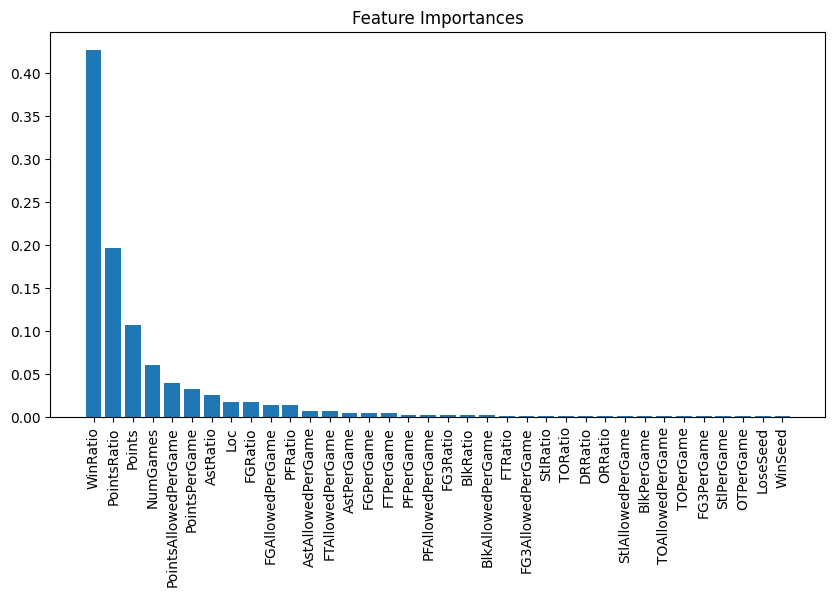

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# Get feature importances
importances = clf.feature_importances_
features = x_train.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

Accuracy:  0.9997622161455237


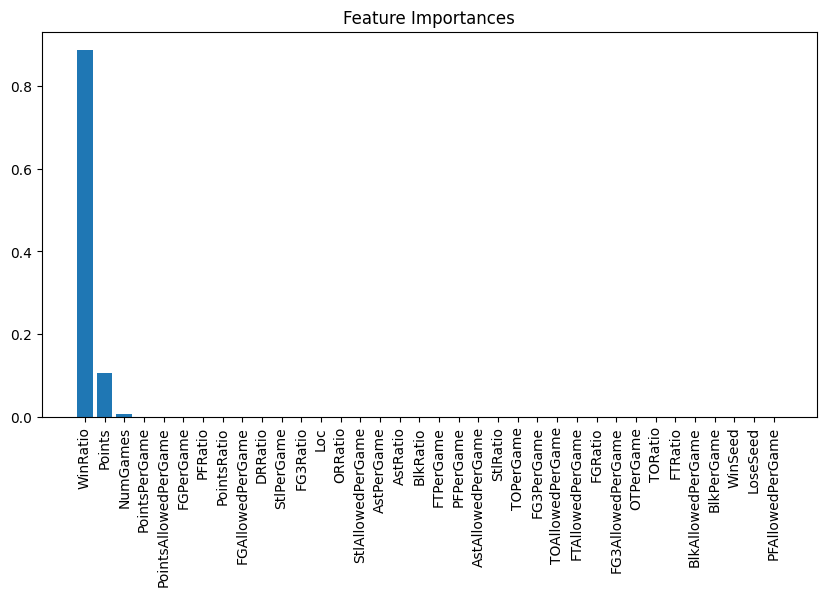

In [18]:
# Fill missing values in training and test sets
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_train.mean())

# Apply gdboost algorithm
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# Get feature importances
importances = clf.feature_importances_
features = x_train.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()
